In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)


In [19]:
import sys
sys.path.append("../src")

from drift_utils import ks_drift_test


In [20]:
ks_drift_test(
    baseline_data["feature_1"],
    new_data["feature_1"]
)


{'ks_statistic': np.float64(0.2297),
 'p_value': np.float64(1.3624830262524531e-42),
 'drift_detected': np.True_}

In [7]:
baseline_data = pd.DataFrame({
    "feature_1": np.random.normal(loc=50, scale=5, size=1000),
    "feature_2": np.random.normal(loc=100, scale=10, size=1000)
})

baseline_data.head()


,feature_1,feature_2
0,52.483571,113.993554
1,49.308678,109.246337
2,53.238443,100.596304
3,57.615149,93.530632
4,48.829233,106.982233


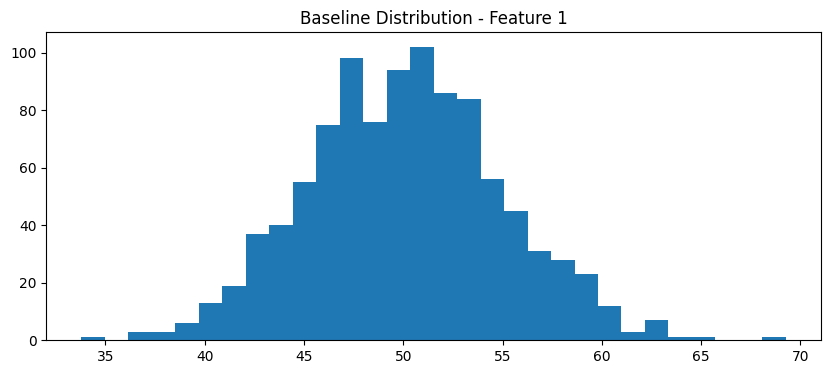

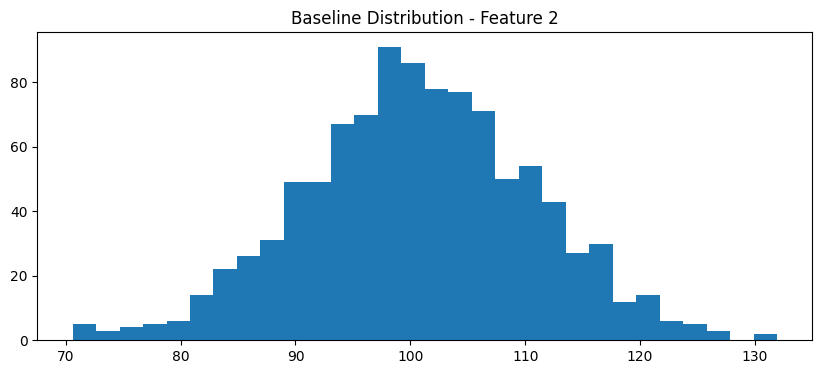

In [8]:
plt.figure(figsize=(10, 4))

plt.hist(baseline_data["feature_1"], bins=30)
plt.title("Baseline Distribution - Feature 1")
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(baseline_data["feature_2"], bins=30)
plt.title("Baseline Distribution - Feature 2")
plt.show()


In [9]:
# Simulate new incoming data (Hyderabad - recent period)
new_data = pd.DataFrame({
    "feature_1": np.random.normal(loc=53, scale=6, size=10000),   # shifted mean + variance
    "feature_2": np.random.normal(loc=95, scale=12, size=10000)   # shifted mean + variance
})

new_data.head()


,feature_1,feature_2
0,48.948930,109.097769
1,52.132888,72.452229
2,48.245480,91.066459
3,51.152231,94.500080
4,41.638312,95.190904


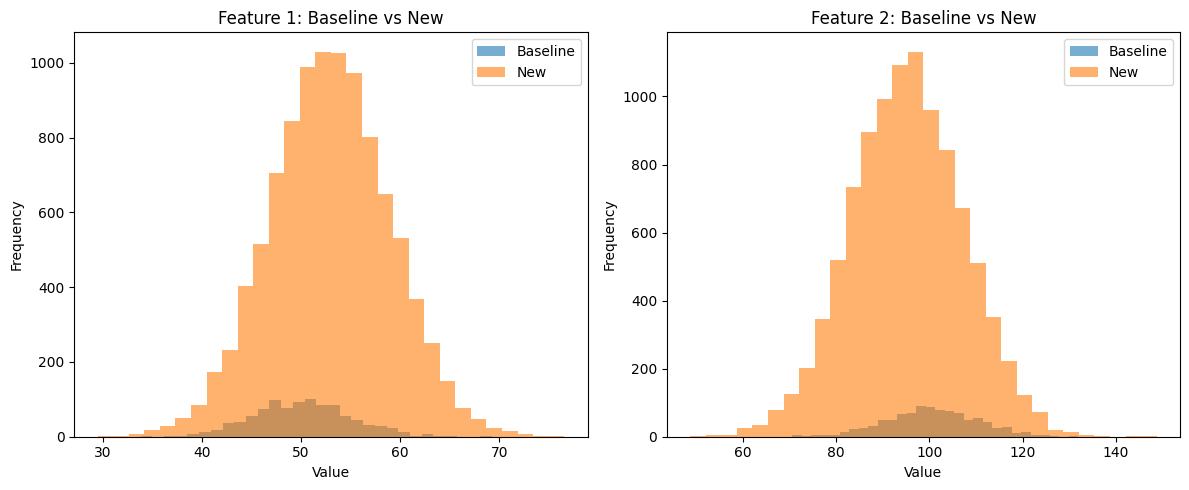

In [10]:
plt.figure(figsize=(12, 5))

# Feature 1 comparison
plt.subplot(1, 2, 1)
plt.hist(baseline_data["feature_1"], bins=30, alpha=0.6, label="Baseline")
plt.hist(new_data["feature_1"], bins=30, alpha=0.6, label="New")
plt.title("Feature 1: Baseline vs New")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

# Feature 2 comparison
plt.subplot(1, 2, 2)
plt.hist(baseline_data["feature_2"], bins=30, alpha=0.6, label="Baseline")
plt.hist(new_data["feature_2"], bins=30, alpha=0.6, label="New")
plt.title("Feature 2: Baseline vs New")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
from scipy.stats import ks_2samp


In [12]:
# KS test for Feature 1
ks_stat_f1, p_value_f1 = ks_2samp(
    baseline_data["feature_1"],
    new_data["feature_1"]
)

# KS test for Feature 2
ks_stat_f2, p_value_f2 = ks_2samp(
    baseline_data["feature_2"],
    new_data["feature_2"]
)

print("Feature 1 KS Statistic:", ks_stat_f1)
print("Feature 1 p-value:", p_value_f1)

print("\nFeature 2 KS Statistic:", ks_stat_f2)
print("Feature 2 p-value:", p_value_f2)


Feature 1 KS Statistic: 0.2297
Feature 1 p-value: 1.3624830262524531e-42

Feature 2 KS Statistic: 0.224
Feature 2 p-value: 1.66639444401006e-40


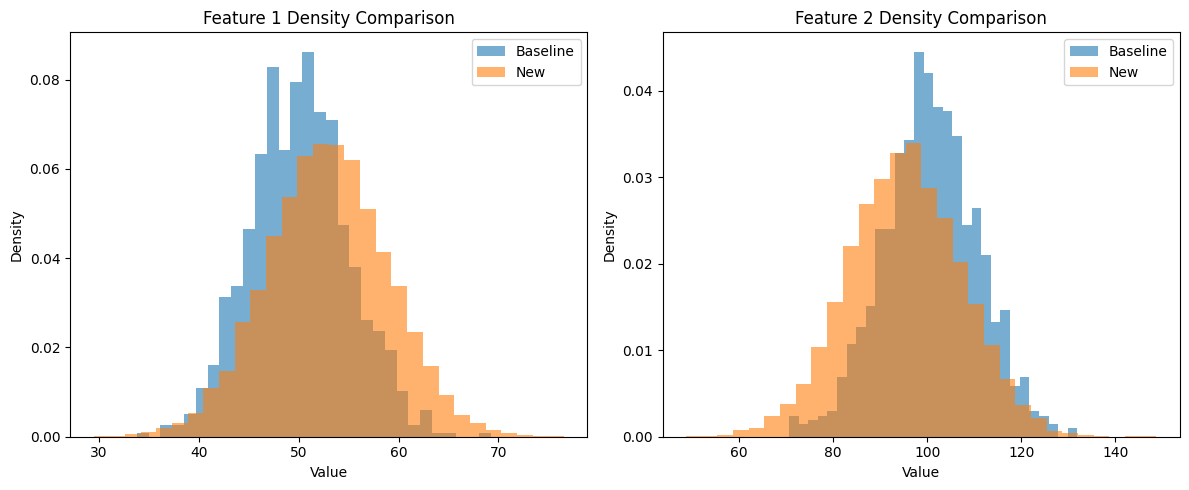

In [13]:
plt.figure(figsize=(12, 5))

# Feature 1 (density)
plt.subplot(1, 2, 1)
plt.hist(baseline_data["feature_1"], bins=30, density=True, alpha=0.6, label="Baseline")
plt.hist(new_data["feature_1"], bins=30, density=True, alpha=0.6, label="New")
plt.title("Feature 1 Density Comparison")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# Feature 2 (density)
plt.subplot(1, 2, 2)
plt.hist(baseline_data["feature_2"], bins=30, density=True, alpha=0.6, label="Baseline")
plt.hist(new_data["feature_2"], bins=30, density=True, alpha=0.6, label="New")
plt.title("Feature 2 Density Comparison")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
# Simulate time-based data for Hyderabad (hourly, 90 days)
date_range = pd.date_range(
    start="2024-01-01",
    periods=24 * 90,   # 90 days hourly
    freq="H"
)

hyd_data = pd.DataFrame({
    "timestamp": date_range,
    # Temperature-like feature with gradual drift
    "temp": np.random.normal(
        loc=30 + np.linspace(0, 3, len(date_range)),  # gradual increase
        scale=2,
        size=len(date_range)
    ),
    # Humidity-like feature with variance drift
    "humidity": np.random.normal(
        loc=60,
        scale=5 + np.linspace(0, 3, len(date_range)),
        size=len(date_range)
    )
})

hyd_data.head()


C:\Users\strom\AppData\Local\Temp\ipykernel_26300\3830142385.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(


,timestamp,temp,humidity
0,2024-01-01 00:00:00,31.675714,69.536318
1,2024-01-01 01:00:00,27.263206,59.114907
2,2024-01-01 02:00:00,28.382151,65.419366
3,2024-01-01 03:00:00,32.981110,53.852442
4,2024-01-01 04:00:00,33.391833,52.394459


In [17]:
# Split data into time windows
early_window = hyd_data.iloc[:len(hyd_data)//2]
late_window = hyd_data.iloc[len(hyd_data)//2:]

len(early_window), len(late_window)


(1080, 1080)

In [18]:
# KS test for temperature drift
ks_temp, p_temp = ks_2samp(
    early_window["temp"],
    late_window["temp"]
)

# KS test for humidity drift
ks_hum, p_hum = ks_2samp(
    early_window["humidity"],
    late_window["humidity"]
)

print("Temperature Drift")
print("KS Statistic:", ks_temp)
print("p-value:", p_temp)

print("\nHumidity Drift")
print("KS Statistic:", ks_hum)
print("p-value:", p_hum)


Temperature Drift
KS Statistic: 0.26944444444444443
p-value: 6.927827711861542e-35

Humidity Drift
KS Statistic: 0.07962962962962963
p-value: 0.0021142036743053046
